In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("netflixData.csv")
df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [5]:
df = df.drop(['Director','Date Added'],axis=1)
df = df.dropna(subset=['Cast','Production Country','Release Date','Rating','Duration','Imdb Score'])

In [6]:
df.isnull().sum()

Show Id               0
Title                 0
Description           0
Genres                0
Cast                  0
Production Country    0
Release Date          0
Rating                0
Duration              0
Imdb Score            0
Content Type          0
dtype: int64

## 1. Content Type on Netflix

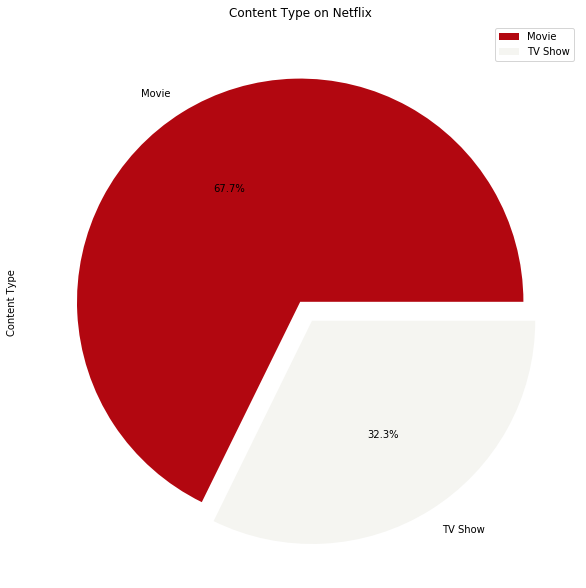

In [7]:
contentType_count = df['Content Type'].value_counts()
contentType_count.plot(kind='pie', autopct='%1.1f%%', legend=True, explode=(0, 0.1), 
                        title = "Content Type on Netflix", colors=["#b20710", "#f5f5f1"],
                        figsize=(10,20))

## 2. Original Release Year

Text(0, 0.5, 'Count of Movie/ TV Show')

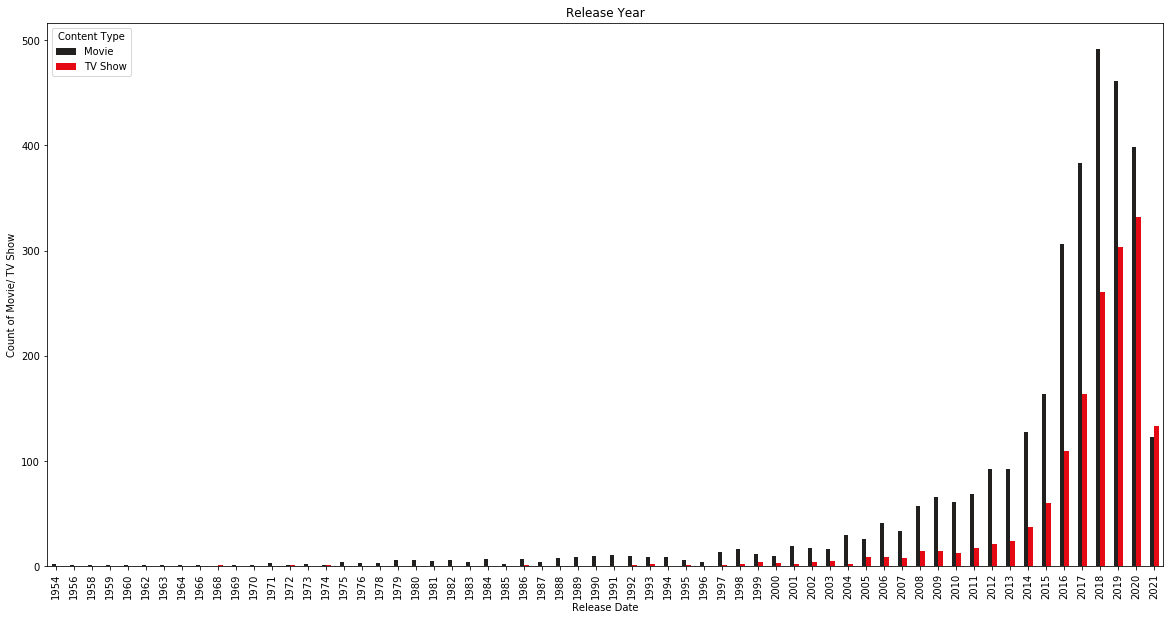

In [8]:
df['Release Date'] = df['Release Date'].round().astype(int)
content_added = df.groupby(["Content Type","Release Date"])["Release Date"].count().unstack('Content Type')
content_added = content_added.sort_values(ascending=True, by='Release Date')
content_added.plot(kind='bar',color=["#221f1f","#e50914"],figsize=(20, 10), title = "Release Year").set_ylabel("Count of Movie/ TV Show")

## 3. Content From Different Countries

In [9]:
df['Production Country'].head(20)

1               South Korea
2                     Italy
3             United States
5                 Indonesia
6                 Indonesia
7             United States
9                   Romania
10                  Romania
11    South Africa, Nigeria
12                   France
13              South Korea
14            United States
15          Portugal, Spain
16            United States
17                Indonesia
18                    India
19                    Egypt
20            United States
21            United States
24                    India
Name: Production Country, dtype: object

In [10]:
# There are multi countries in a single column so we create another column that will store only the first country.
df['First Production Country'] = df['Production Country'].str.split(',', expand=True)[0]
df.head()

,Show Id,Title,Description,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,First Production Country
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...","Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020,TV-MA,99 min,6.2/10,Movie,South Korea
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019,TV-14,95 min,6.4/10,Movie,Italy
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020,TV-MA,1 Season,6.6/10,TV Show,United States
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...","Dramas, International Movies, Romantic Movies","Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2018,TV-G,102 min,7.0/10,Movie,Indonesia
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,2020,TV-G,104 min,7.0/10,Movie,Indonesia


Text(0.5, 0, 'Production Country')

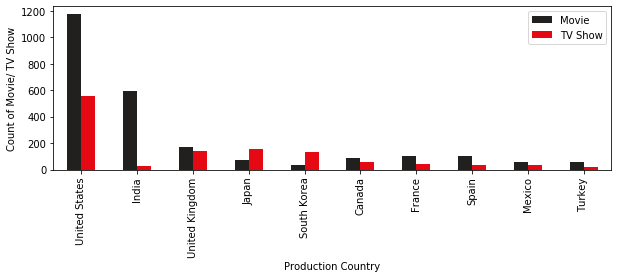

In [11]:
country_grouped = df.groupby(["Content Type","First Production Country"])["First Production Country"].count().unstack('Content Type')
country_grouped.columns =['Movie', 'TV Show']
country_grouped['Total'] = country_grouped["Movie"] + country_grouped["TV Show"]
country_grouped = country_grouped.sort_values(ascending=False, by='Total')
country_grouped[:10].plot(kind='bar',y=["Movie","TV Show"],color=["#221f1f","#e50914"],figsize=(10, 3)).set_ylabel("Count of Movie/ TV Show")
plt.xlabel("Production Country")

## 4. Ratings

Text(0, 0.5, 'Count of Movie/ TV Show')

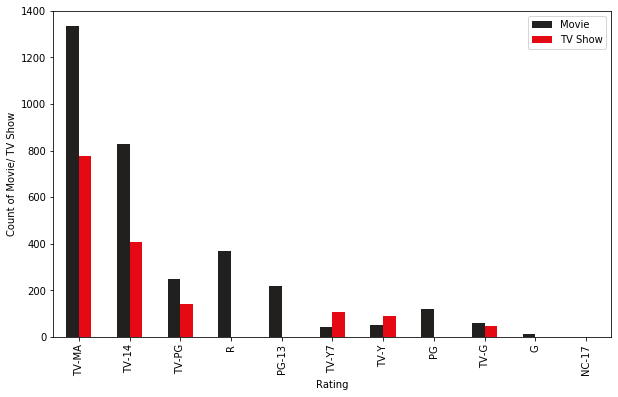

In [12]:
rating_grouped = df.groupby(["Content Type","Rating"])["Rating"].count().unstack('Content Type')
rating_grouped.columns =['Movie', 'TV Show']
rating_grouped['TV Show'] = rating_grouped['TV Show'].fillna(0)
rating_grouped['Total'] = rating_grouped["Movie"] + rating_grouped["TV Show"]
rating_grouped = rating_grouped.sort_values(ascending=False, by='Total')
rating_grouped.plot(kind='bar',y=["Movie","TV Show"],color=["#221f1f","#e50914"],figsize=(10, 6)).set_ylabel("Count of Movie/ TV Show")

## 5. Imdb Score

### Top Rated Content (Imdb Score over 9.0)
#### Breaking Bad is the #1 ranked TV show, while David Attenborough: A Life on Our Planet is the #1 ranked Movie

In [13]:
df_topRated = df.loc[df["Imdb Score"] >= '9.0/10', ["Title","Imdb Score","Content Type"]]
df_topRated = df_topRated.sort_values(ascending=False, by='Imdb Score').reset_index(drop=True)
df_topRated

,Title,Imdb Score,Content Type
0,Breaking Bad,9.4/10,TV Show
1,Avatar: The Last Airbender,9.3/10,TV Show
2,Our Planet,9.2/10,TV Show
3,Reply 1988,9.2/10,TV Show
4,The Last Dance,9.2/10,TV Show
5,David Attenborough: A Life on Our Planet,9.1/10,Movie
6,Leyla and Mecnun,9.1/10,TV Show
7,The Untamed,9.1/10,TV Show
8,Attack on Titan,9.0/10,TV Show
9,Bo Burnham: Inside,9.0/10,Movie


### Lowest Rated Content (Imdb Score below 2.0)
#### Content with Imdb Score under 2.0 are all movies. Aerials is the worst rated movie.

In [14]:
df_lowestRated = df.loc[df["Imdb Score"] < '2.0/10', ["Title","Imdb Score","Content Type"]]
df_lowestRated = df_lowestRated.sort_values(ascending=True, by='Imdb Score').reset_index(drop=True)
df_lowestRated

,Title,Imdb Score,Content Type
0,Aerials,1.3/10,Movie
1,Time to Dance,1.7/10,Movie
2,Himmatwala,1.8/10,Movie
3,5Gang,1.9/10,Movie
4,Cross: Rise of the Villains,1.9/10,Movie


## 6. Top Genres

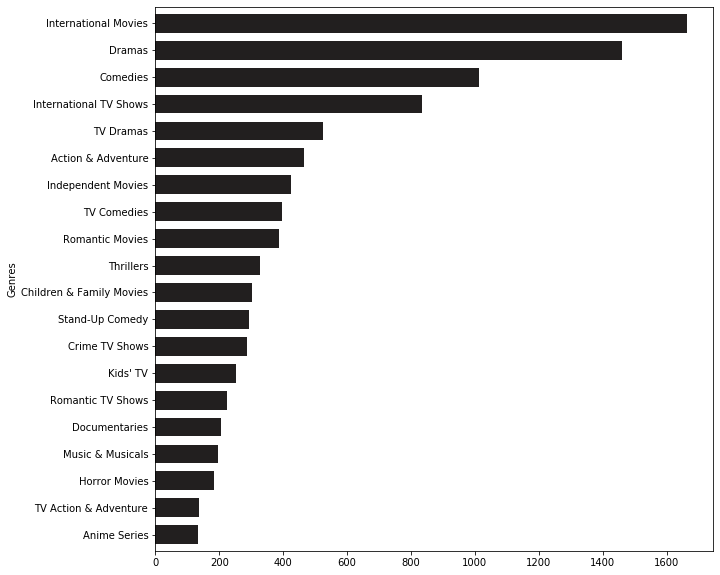

In [15]:
genres = ", ".join(df['Genres']).split(", ")
genres

from collections import Counter
cnt = Counter()
for genre in genres:
    cnt[genre] += 1

topGenres = cnt.most_common(20)
df_topGenres = pd.DataFrame (topGenres, columns = ['Genres','Genres Count'])
df_topGenres.sort_values(ascending=True, by='Genres Count', inplace=True)
df_topGenres.plot.barh(x='Genres',color=["#221f1f","#e50914"],width=0.7,legend=False, figsize=(10, 7))

## 7. Cast

### Top Movie Actor

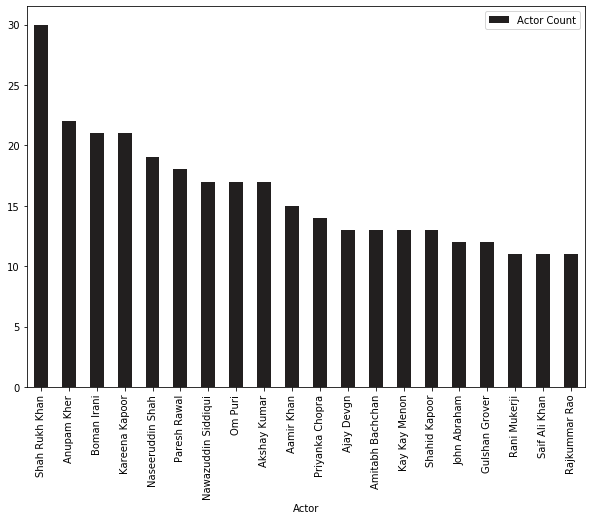

In [16]:
cast_grouped = df.groupby(["Content Type","Cast"])["Cast"].count().unstack('Content Type')
cast_grouped.columns =['Movie', 'TV Show']
cast_grouped_movie = cast_grouped[cast_grouped["Movie"].notnull()].iloc[:,:1]
cast_grouped_movie.reset_index(level='Cast', inplace=True)

movieCast = ", ".join(cast_grouped_movie['Cast']).split(", ")
movieCast

cnt_movieCast = Counter()

for cast in movieCast:
    cnt_movieCast[cast] += 1

movieCast = cnt_movieCast.most_common(20)
df_movieCast = pd.DataFrame (movieCast, columns = ['Actor','Actor Count'])
df_movieCast.sort_values(ascending=False, by='Actor Count', inplace=True)
df_movieCast.plot(kind='bar',x='Actor',color=["#221f1f","#e50914"],figsize=(10, 7))

### Top TV Actor

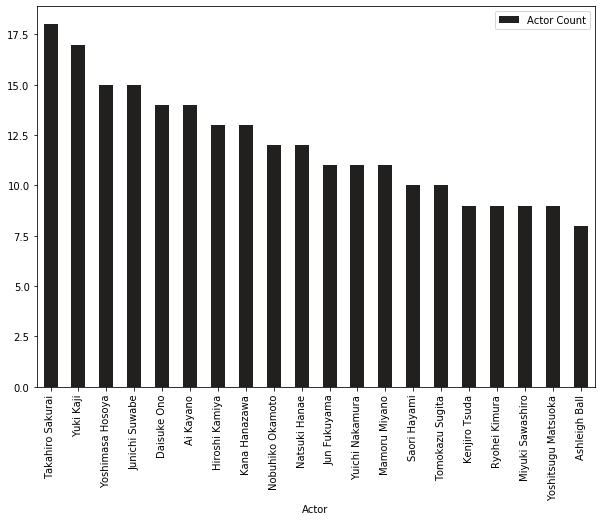

In [17]:
cast_grouped_tv = cast_grouped[cast_grouped["TV Show"].notnull()].iloc[:,:1]
cast_grouped_tv.reset_index(level='Cast', inplace=True)

tvCast = ", ".join(cast_grouped_tv['Cast']).split(", ")
tvCast

cnt_tvCast = Counter()

for cast in tvCast:
    cnt_tvCast[cast] += 1

tvCast = cnt_tvCast.most_common(20)
df_tvCast = pd.DataFrame (tvCast, columns = ['Actor','Actor Count'])
df_tvCast.sort_values(ascending=False, by='Actor Count', inplace=True)
df_tvCast.plot(kind='bar',x='Actor',color=["#221f1f","#e50914"],figsize=(10, 7))